<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>Infer√™ncia Estat√≠stica (GCC1625) - Trabalho 3</center></h1>

- Nome completo: <Vinicius Gon√ßalves Paraizo Borges>
- [Link para v√≠deo](<https://youtu.be/GjhXjibgIuA>)

# (1) Correla√ß√£o e covari√¢ncia


Voc√™ √© analista de dados de uma empresa de educa√ß√£o. Foram coletadas informa√ß√µes
sobre os seguintes atributos de alunos de um curso online:

- horas_estudo: n√∫mero de horas que o aluno estudou na semana;
- nota_final: nota final no curso (0 a 100).

Seu objetivo √© investigar a rela√ß√£o entre essas duas vari√°veis.

1. C√°lculo Manual
    - Calcule a m√©dia de cada vari√°vel;
    - Calcule a covari√¢ncia amostral:
        - $Cov(X,Y) = \frac{1}{n-1}*\sum_{i=1}^n (X_{i} - \bar{X})(Y_{i} - \bar{Y})$
    - Calcule a correla√ß√£o de Pearson:
        - $\rho(X,Y) = \frac{Cov(X,Y)}{S_{X}S_{Y}}$

Use as fun√ß√µes np.mean(), np.std() e np.cov() para comparar seus resultados.

In [124]:
import numpy as np
import pandas as pd

np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = 50 + 4 * horas_estudo + np.random.normal(0, 5,
30)
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

# C√≥digo disponibilizado no enunciado da quest√£o

In [125]:
df.iloc[:5]

Horas de Estudo   Nota Final 
0         10.993428    90.965180
1          9.723471    98.155277
2         11.295377    95.114022
3         13.046060    96.895684
4          9.531693    92.239498

In [126]:
# calcular a m√©dia das vari√°veis:

x_bar = df['Horas de Estudo '].mean()
y_bar = df['Nota Final '].mean()

print(x_bar)
print(y_bar)

9.623706208297927
87.88901248174199


In [127]:
df.iloc[0][df.columns[0]]

10.993428306022466

In [128]:
def covariance(x_bar,y_bar,df):
    desvios = []
    n = len(df)
    for i in range(n):
        x_i = df.iloc[i][df.columns[0]]
        y_i = df.iloc[i][df.columns[1]]
        desvio_x = x_i - x_bar
        desvio_y = y_i - y_bar
        desvios.append(desvio_x * desvio_y)
    
    sum = np.sum(desvios)
    cov = (1/(n-1))*sum
    return cov

In [129]:
cov = covariance(x_bar,y_bar,df)

print(cov)

# Covariancia positiva !

13.788410270749694


In [130]:
covariance = np.cov(df['Horas de Estudo '], df['Nota Final '])
print(covariance) # resultado igual !

[[ 3.24004628 13.78841027]
 [13.78841027 80.1403243 ]]


In [133]:
# Coeficiente de pearson:
# r = cov(x, y) / (œÉx * œÉy)

def pearson_coeff(cov,s1,s2):
    return cov / (s1*s2)

s1 = df['Horas de Estudo '].std()
s2 = df['Nota Final '].std()

p = pearson_coeff(cov,s1,s2)

p

0.8556832738480706

In [134]:
pearson_coef = np.corrcoef(df['Horas de Estudo '], df['Nota Final '])[0, 1]

pearson_coef # Resultado igual !

0.8556832738480707

2. Visualiza√ß√£o
    - Crie um gr√°fico de dispers√£o entre horas_estudo e nota_final;
    - Adicione uma linha de tend√™ncia linear;
    - Interprete o resultado: a rela√ß√£o √© positiva, negativa ou nula?

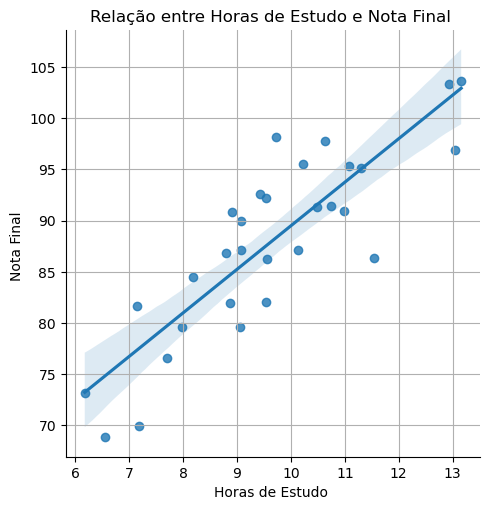

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='Horas de Estudo ', y='Nota Final ', data=df)
plt.title('Rela√ß√£o entre Horas de Estudo e Nota Final ')
plt.grid(True)
plt.show()

# Rela√ß√£o positiva: quando uma vari√°vel cresce, a outra cresce tamb√©m.

3. Interpreta√ß√£o
    - O valor da correla√ß√£o est√° mais pr√≥ximo de 0, +1 ou ‚Äì1? O que isso indica?
    - A covari√¢ncia obtida √© positiva ou negativa? O que isso significa no contexto?
    - Se a unidade da nota fosse alterada (ex: de 0‚Äì100 para 0‚Äì10), o valor da
correla√ß√£o mudaria? E a covari√¢ncia?

In [ ]:
# O valor da correla√ß√£o est√° mais pr√≥ximo de +1 do que de 0 (sem correla√ß√£o) e muito menos de -1 (correla√ß√£o negativa)
# Podemos ver isso atrav√©s da matriz de correla√ß√£o (covari√¢ncia normalizada) - igual ao coef de pearson.

print(df[['Horas de Estudo ', 'Nota Final ']].corr(),'\n\n')

# Corri√¢ncia obtida √© positiva. Isso significa que se uma vari√°vel aumenta, a outra tem tend√™ncia em aumentar tamb√©m.

# A unidade sendo alterada, o valor da covari√¢ncia altera, pois a escala muda:
df['Nota Final - /10'] = df['Nota Final ']/10

cov_alt = np.cov(df['Horas de Estudo '], df['Nota Final - /10'])
print(f"cov: {cov}")
print(f"cov alt: {cov_alt[0][0]}\n\n")

# Por√©m, a correla√ß√£o n√£o mudaria, pois se trata da covari√¢ncia normalizada (entre -1 e 1). Os desvios padr√µes se ajustam.
print(df[['Horas de Estudo ', 'Nota Final - /10']].corr())


                  Horas de Estudo   Nota Final 
Horas de Estudo           1.000000     0.855683
Nota Final                0.855683     1.000000 


cov: 13.788410270749694
cov alt: 3.240046277462607


                  Horas de Estudo   Nota Final - /10
Horas de Estudo           1.000000          0.855683
Nota Final - /10          0.855683          1.000000


4. Outras simula√ß√µes
    - Gere um novo conjunto de dados em que a correla√ß√£o entre horas_estudo
e nota_final seja pr√≥xima de zero;
    - Gere um conjunto com correla√ß√£o negativa entre as vari√°veis.

In [137]:
# Conjunto em que correla√ß√£o entre 'horas estudo' e 'nota final' seja pr√≥xima de zero
np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = np.random.uniform(0, 100, 30) # numeros aleat√≥rios entre 0 a 100
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

df.corr()

Horas de Estudo   Nota Final 
Horas de Estudo           1.000000    -0.118644
Nota Final               -0.118644     1.000000

In [138]:
# Conjunto em que correla√ß√£o entre 'horas estudo' e 'nota final' seja negativa
np.random.seed (42)
horas_estudo = np.random.normal (10, 2, 30)
nota_final = 80 - np.random.normal(30, 10, 30) * horas_estudo 
df = pd.DataFrame ({
'Horas de Estudo ': horas_estudo ,
'Nota Final ': nota_final,
})

df.corr()

Horas de Estudo   Nota Final 
Horas de Estudo             1.0000      -0.5248
Nota Final                 -0.5248       1.0000

# (2) Regress√£o Linear M√∫ltipla

Considere o conjunto de dados Auto1. O arquivo Auto.csv cont√©m os dados para
essa parte do trabalho. Esse arquivo est√° na plataforma MS Teams.

(i) Produza uma matriz de gr√°fico de dispers√£o que inclua todas as vari√°veis
no conjunto de dados.

In [ ]:
#!pip install ISLP

In [139]:
from ISLP import load_data
import seaborn as sns

Auto = load_data('Auto')

In [140]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

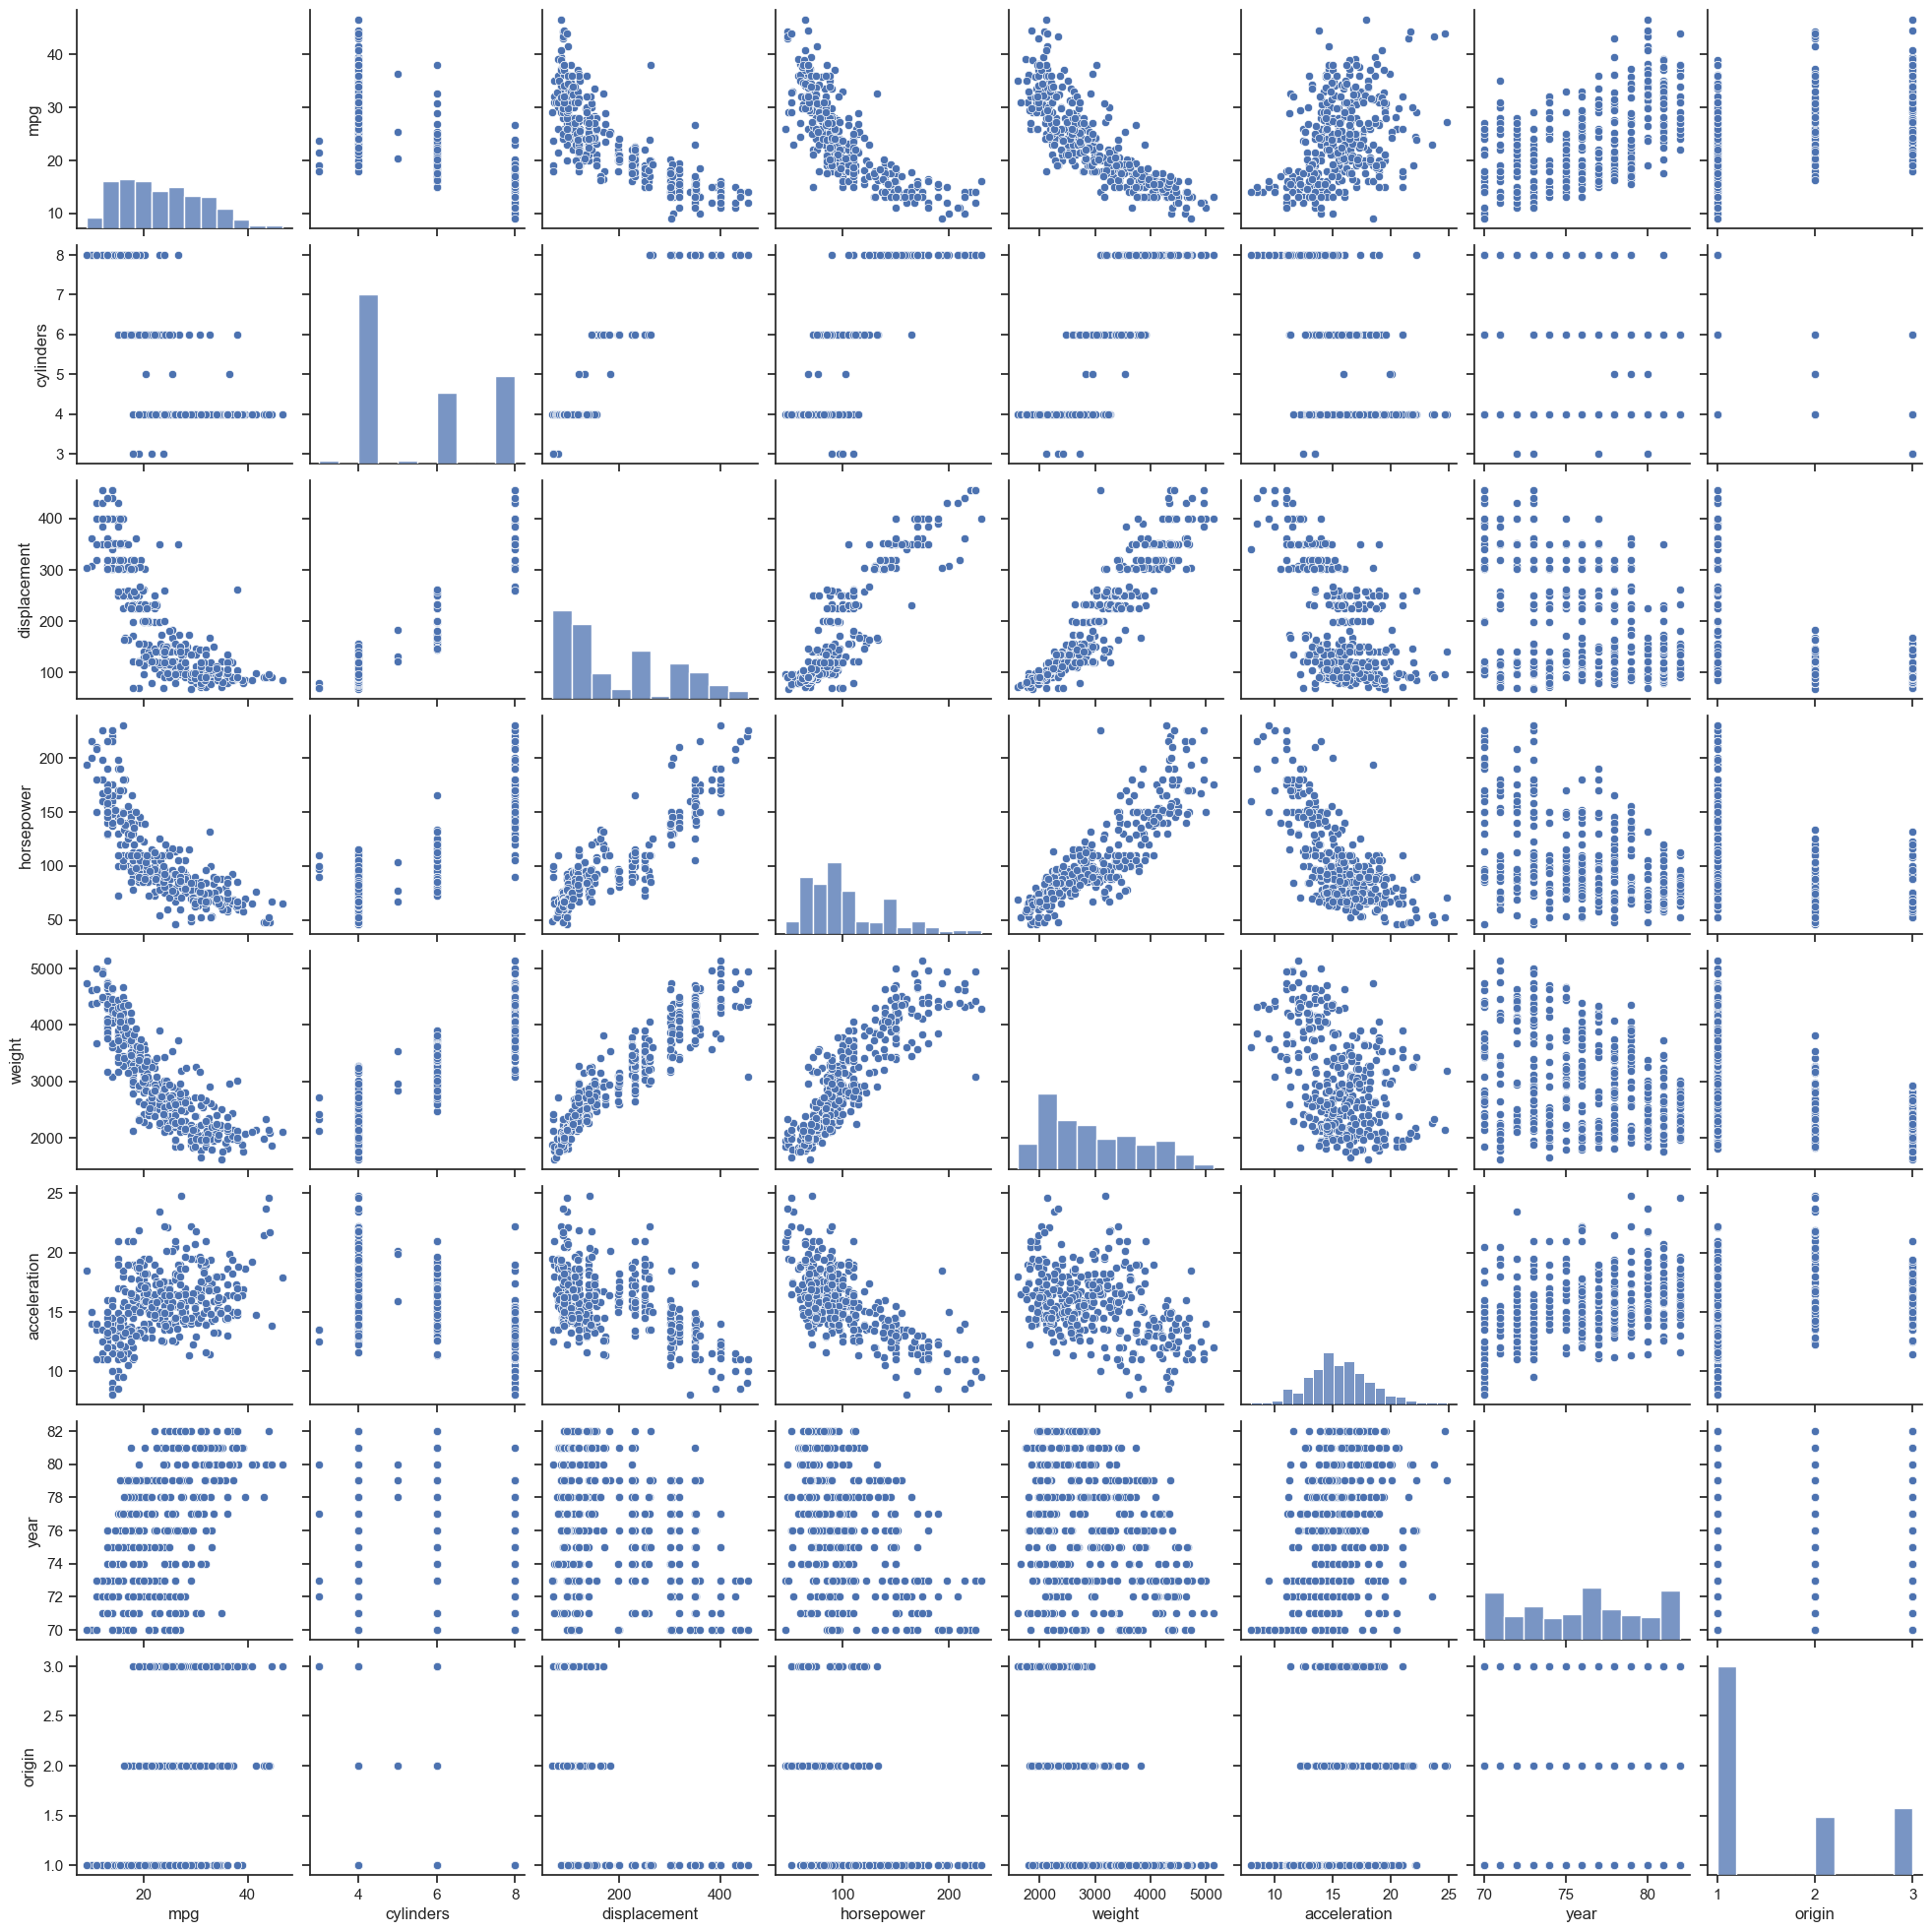

In [141]:
sns.set_theme(style="ticks")

sns.pairplot(Auto)

(ii) Calcule a matriz de correla√ß√µes entre as vari√°veis usando a fun√ß√£o corr()
do pandas.DataFrame. Voc√™ precisar√° excluir a vari√°vel name, que √© qualitativa.

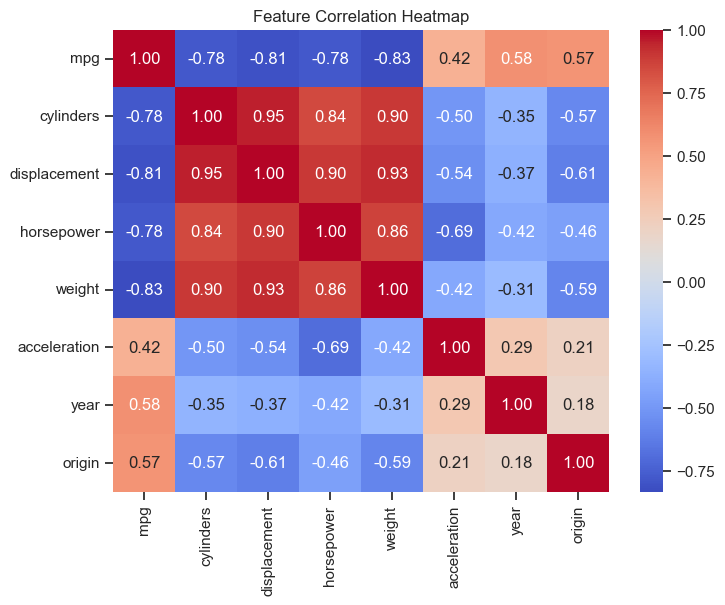

In [142]:
plt.figure(figsize=(8, 6))
sns.heatmap(Auto.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

(iii) Use a fun√ß√£o ols() da biblioteca statsmodels para realizar uma regress√£o
linear m√∫ltipla com mpg como resposta e todas as outras vari√°veis (exceto
nome) como os preditores. Use a fun√ß√£o summary() para imprimir os resultados.
Comente sobre a sa√≠da.


In [ ]:
!python -m pip install statsmodels

In [143]:
import statsmodels.api as sm

# A reta OLS √© aquela que minimiza a dist√¢ncia vertical ao quadrado entre os pontos observados e a reta.

Auto_sem_mpg = Auto[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]

# Defina as vari√°veis independentes (X) e a vari√°vel dependente (Y)
X = sm.add_constant(Auto_sem_mpg)
Y = Auto['mpg']
modelo = sm.OLS(Y, X)
resultado = modelo.fit()

# Resultados
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          2.04e-139
Time:                        15:00:41   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

* Existe uma rela√ß√£o entre os preditores e a resposta?
    * Sim. A regress√£o mostra um $`R^2`$ score de 0.821, o que significa que 82,1% da variabilidade do consumo de combust√≠vel (mpg) √© explicada pelos preditores usados no modelo. Isso indica uma forte rela√ß√£o global entre os preditores (features) e a vari√°vel dependente 'MPG'.


* Quais preditores parecem ter um valor estatisticamente significativo
com rela√ß√£o √† resposta (p < 0.05)?
    * displacement (p = 0.008)
    * weight (p ‚âà 0.000)
    * year (p ‚âà 0.000)
    * origin (p ‚âà 0.000)

* O que sugere o coeficiente correspondente √† vari√°vel ano?
    * Como 'Year' possui um valor estatisticamente significativo com rela√ß√£o √† resposta, o seu valor influenciar√° mais na resposta. Logo, a cada aumento de 1 ano no modelo do carro est√° associado, em m√©dia, a um aumento de 0.75 milhas por gal√£o (mpg), mantendo todas as outras vari√°veis constantes. Isso sugere que os carros mais novos tendem a ser mais eficientes em termos de Miles per Galon.

(iv) Use a fun√ß√£o regplot da biblioteca seaborn para produzir gr√°ficos de diagn√≥stico
do ajuste de regress√£o linear. Comente sobre quaisquer problemas
que voc√™ encontrar com o ajuste.

In [144]:
pred = resultado.predict(X)

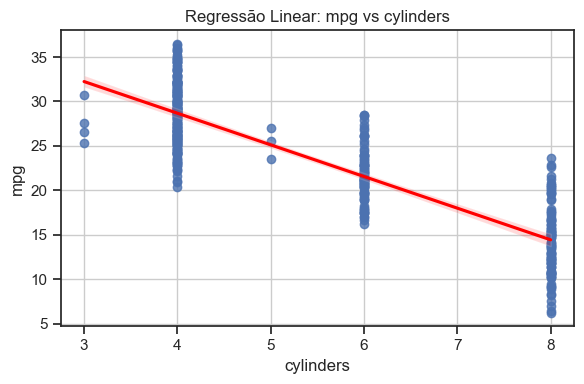

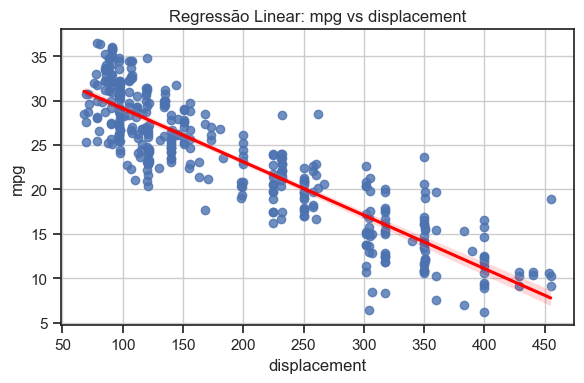

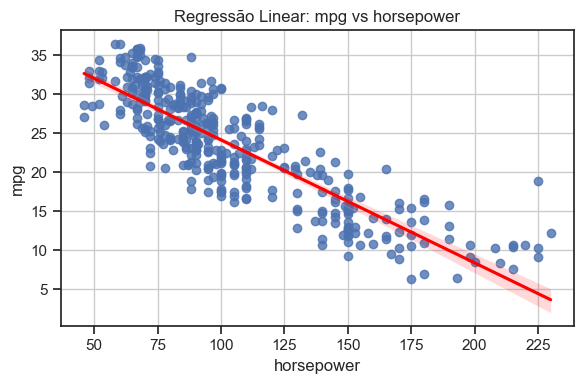

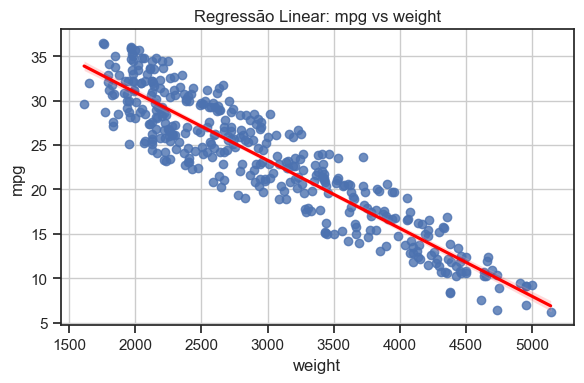

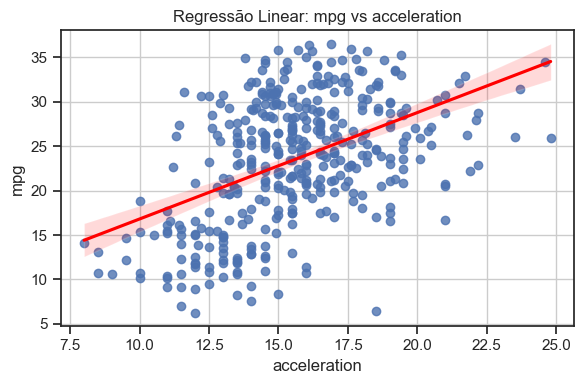

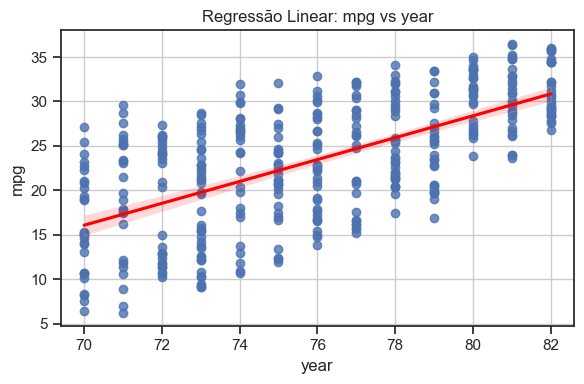

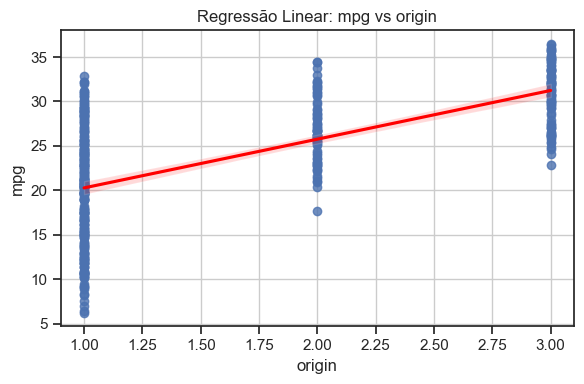

In [145]:


variaveis = ['cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'year', 'origin']

# Cria gr√°ficos regplot para cada vari√°vel preditora
for var in variaveis:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=Auto[var], y=pred, line_kws={"color": "red"})
    plt.title(f"Regress√£o Linear: mpg vs {var}")
    plt.xlabel(var)
    plt.ylabel('mpg')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

*Sua explica√ß√£o aqui:*

Percebe-se, pelos gr√°ficos gerados com regplot, que algumas vari√°veis apresentam alta dispers√£o dos pontos em torno da reta ajustada, como √© o caso de acceleration. Isso indica uma fraca rela√ß√£o linear com a vari√°vel de resposta mpg, o que pode resultar em erros altos (dist√¢ncias verticais ao quadrado) no ajuste da regress√£o.

Al√©m disso, vari√°veis como cylinders, origin e year possuem um n√∫mero limitado de valores distintos no eixo x, formando faixas discretas de pontos. Isso ocorre porque essas vari√°veis s√£o essencialmente categ√≥ricas ou discretas (por exemplo, origin representa a origem do carro e cylinders a quantidade de cilindros inteiros). Ao usar regress√£o linear com essas vari√°veis como se fossem cont√≠nuas, o modelo pode falhar em capturar varia√ß√µes importantes, pois ele tenta ajustar uma m√©dia cont√≠nua sobre valores que mudam em saltos.

---

# (3) DiD: Sal√°rio m√≠nimo x taxa de empregos

Nesta parte, voc√™ ir√° replicar um estudo realizado originalmente por Card and
Krueger [1994] sobre o efeito do aumento do sal√°rio m√≠nimo sobre a taxa
de empregos. A teoria econ√¥mica convencional sugere que num mercado de
trabalho com concorr√™ncia perfeita, um aumento no sal√°rio m√≠nimo leva a um
aumento no desemprego. Em abril de 1992, o estado americano de Nova Jersey
(NJ) aumentou o sal√°rio m√≠nimo (por hora) de US$ 4,25 para US$ 5,05. Card e
Krueger (1994) utilizaram a t√©cnica Difference-in-Difference (DiD) e mostraram
que este aumento nos sal√°rios m√≠nimos levou a um aumento no emprego no setor
dos restaurantes de fast food. O grupo de controle utilizado nesse estudo foi
o estado vizinho da Pensilv√¢nia (PA), que n√£o foi sujeito a essa mudan√ßa de
pol√≠tica. Os autores realizaram uma pesquisa antes e depois do aumento do
sal√°rio m√≠nimo com uma amostra representativa de restaurantes de fast food
em NJ e PA. Esta configura√ß√£o pode ser considerada quase experimental, uma
vez que ambos os estados n√£o s√£o id√™nticos em muitos aspectos e o processo
legislativo, para aumentar o sal√°rio m√≠nimo, n√£o foi iniciado ao acaso.
O arquivo card_krueger_1994_mod.csv cont√©m os dados para essa parte do
trabalho. Esse arquivo est√° na plataforma MS Teams.


(i) Reproduza o gr√°fico apresentado na Figura 1 do estudo supra-mencionado.

In [146]:
import pandas as pd


url = 'https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/card_krueger_1994_mod.csv'
df = pd.read_csv(url)

df.columns

Index(['Unnamed: 0', 'bonus', 'chain', 'co_owned', 'date', 'empft', 'emppt',
       'firstinc', 'hrsopen', 'inctime', 'meals', 'ncalls', 'nmgrs', 'nregs',
       'nregs11', 'observation', 'open', 'pctaff', 'pentree', 'pfry', 'psoda',
       'region', 'sheet', 'special', 'state', 'status', 'type', 'wage_st',
       'emptot', 'pct_fte'],
      dtype='object')

In [147]:
df_filtrado = df[['wage_st', 'state', 'date']].dropna()

df_filtrado['date'] = pd.to_datetime(df_filtrado['date'])

In [148]:
df_filtrado

wage_st         state       date
410     4.30  Pennsylvania 1992-11-17
411     4.45  Pennsylvania 1992-11-12
412     5.00  Pennsylvania 1992-11-12
413     5.25  Pennsylvania 1992-11-14
414     4.75  Pennsylvania 1992-11-14
..       ...           ...        ...
815     5.25    New Jersey 1992-11-14
816     5.25    New Jersey 1992-11-17
817     5.05    New Jersey 1992-11-11
818     5.05    New Jersey 1992-12-17
819     5.14    New Jersey 1992-11-13

[389 rows x 3 columns]

In [149]:
# Filtrar apenas os dados de novembro de 1992
df_nov_1992 = df_filtrado[df_filtrado['date'].dt.to_period('M') == '1992-11']


# e agora os de dezembro de 1992
df_dez_1992 = df_filtrado[df_filtrado['date'].dt.to_period('M') == '1992-12']

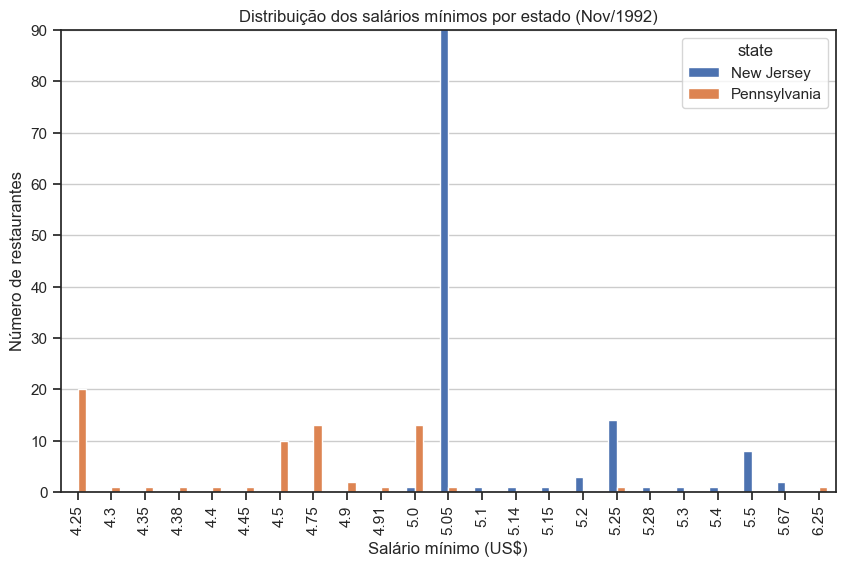

In [150]:
import matplotlib.pyplot as plt

salarios = pd.crosstab(df_nov_1992['state'], df_nov_1992['wage_st']).T

salarios.plot.bar(figsize=(10, 6))
plt.title('Distribui√ß√£o dos sal√°rios m√≠nimos por estado (Nov/1992)')
plt.xlabel('Sal√°rio m√≠nimo (US$)')
plt.ylabel('N√∫mero de restaurantes')
plt.ylim(0, 90)
plt.grid(axis='y')
plt.show()

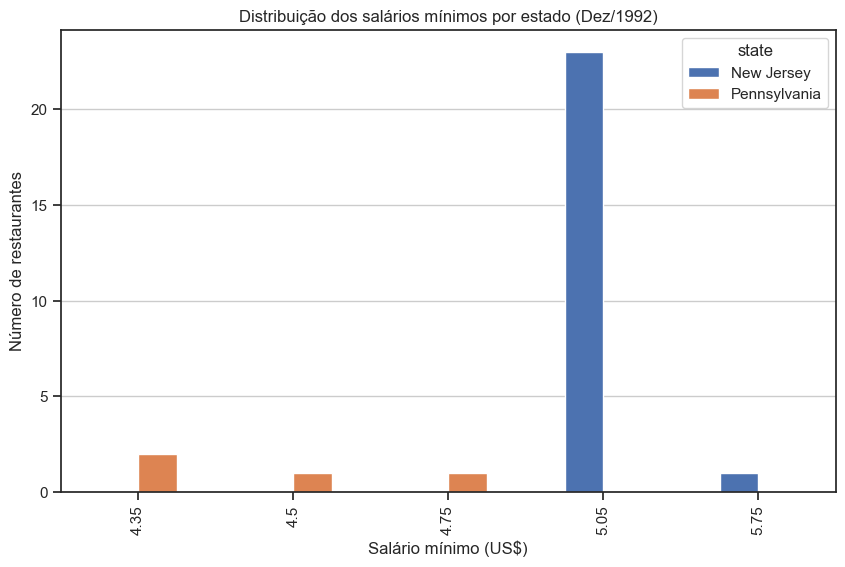

In [151]:
salarios = pd.crosstab(df_dez_1992['state'], df_dez_1992['wage_st']).T

salarios.plot.bar(figsize=(10, 6))
plt.title('Distribui√ß√£o dos sal√°rios m√≠nimos por estado (Dez/1992)')
plt.xlabel('Sal√°rio m√≠nimo (US$)')
plt.ylabel('N√∫mero de restaurantes')
plt.grid(axis='y')
plt.show()

(ii) Calcule a estimativa DiD usando a abordagem de computar a diferen√ßa
das m√©dias. Ou seja, neste item voc√™ n√£o deve usar a statsmodels para
realizar a regress√£o. Use apenas Python (ou R) para computar as m√©dias
da vari√°vel de interesse para os dois grupos, antes e depois da interven√ß√£o.


$ DiD = (\bar{Y}_{NJ, p√≥s} - \bar{Y}_{NJ, pr√©}) - (\bar{Y}_{PA, p√≥s} - \bar{Y}_{PA, pr√©}) $

In [152]:
df_filtrado['post'] = (df_filtrado['date'].dt.strftime('%Y-%m') == '1992-12').astype(int)

In [153]:
# M√©dias por grupo
mean_nj_post = df_filtrado[(df_filtrado['state'] == 'New Jersey') & (df_filtrado['post'] == 1)]['wage_st'].mean()
mean_nj_pre  = df_filtrado[(df_filtrado['state'] == 'New Jersey') & (df_filtrado['post'] == 0)]['wage_st'].mean()
mean_pa_post = df_filtrado[(df_filtrado['state'] == 'Pennsylvania') & (df_filtrado['post'] == 1)]['wage_st'].mean()
mean_pa_pre  = df_filtrado[(df_filtrado['state'] == 'Pennsylvania') & (df_filtrado['post'] == 0)]['wage_st'].mean()

# Estimativa DiD
did = (mean_nj_post - mean_nj_pre) - (mean_pa_post - mean_pa_pre)

print("Estimativa DiD:", did) # O DiD retorna o EFEITO CAUSAL M√âDIO SOBRE A VARI√ÅVEL DE INTERESSE (SAL√ÅRIO)

# retornou um valor > 0 

Estimativa DiD: 0.13590415270585954


(iii) Agora compute novamente a estimativa DiD, dessa vez utilizando a regress√£o
linear. Para isso, voc√™ deve inicialmente criar duas vari√°veis dummy.
Um indica o in√≠cio do tratamento (tempo) e √© igual a zero antes do tratamento
e igual a um ap√≥s o tratamento. A outra vari√°vel separa as observa√ß√µes
em grupo de tratamento e grupo controle (tratado). Essa segunda
vari√°vel dummy √© igual a um para restaurantes fast food localizados em NJ
e igual a zero para restaurantes fast food localizados no PA. Em seguida,
crie a vari√°vel de intera√ß√£o multiplicativa. Finalmente, use a biblioteca
statsmodels para gerar o modelo de regress√£o linear. Apresente sua an√°lise
e interpreta√ß√£o do resultado obtido.

In [154]:
# Œ≤0: Baseline outcome for control group before treatment. 
# Œ≤1: Change over time for the control group (i.e., from before to after). 
# Œ≤2: Difference between groups before treatment. 
# Œ≤3: Difference-in-Differences (DiD) ‚Äî the additional change in the treated group relative to the change in the control group.


# Mais f√°cil visualizar com os valores esperados:

# Treated	    Post	       Expected Value of ùëå
# ‚Äã0 (Control)	 0 (Before)     ùõΩ0 ‚Äã 
# 0 (Control)   1 (After)      ùõΩ0 + ùõΩ1
# 1 (Treated)	0 (Before)     ùõΩ0 + ùõΩ2
# 1 (Treated)	1 (After)      ùõΩ0 + ùõΩ1 + ùõΩ2 + ùõΩ3

df_filtrado['treated'] = (df_filtrado['state'] == 'New Jersey').astype(int)
df_filtrado['interacao'] = df_filtrado['treated'] * df_filtrado['post'] # captura o efeito diferencial do tratamento (DiD)
print(df_filtrado)

     wage_st         state       date  post  treated  interacao
410     4.30  Pennsylvania 1992-11-17     0        0          0
411     4.45  Pennsylvania 1992-11-12     0        0          0
412     5.00  Pennsylvania 1992-11-12     0        0          0
413     5.25  Pennsylvania 1992-11-14     0        0          0
414     4.75  Pennsylvania 1992-11-14     0        0          0
..       ...           ...        ...   ...      ...        ...
815     5.25    New Jersey 1992-11-14     0        1          0
816     5.25    New Jersey 1992-11-17     0        1          0
817     5.05    New Jersey 1992-11-11     0        1          0
818     5.05    New Jersey 1992-12-17     1        1          1
819     5.14    New Jersey 1992-11-13     0        1          0

[389 rows x 6 columns]


In [156]:
import statsmodels.api as sm

X = df_filtrado[['treated', 'post', 'interacao']]
X = sm.add_constant(X)
y = df_filtrado['wage_st']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                wage_st   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.74e-58
Time:                        15:09:26   Log-Likelihood:                 119.23
No. Observations:                 389   AIC:                            -230.5
Df Residuals:                     385   BIC:                            -214.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6252      0.022    211.481      0.0

*Sua explica√ß√£o aqui:*

Obtivemos a mesma estimativa DiD quando fizemos o c√°lculo manualmente anteriormente: **0.1359**. Por√©m, ao fazermos com RegLin, obtemos esse summary, que √© muito mais completo e explicativo, com seus respectivos p_valores.

O coeficiente da intera√ß√£o (0.1359) √© o efeito causal estimado da pol√≠tica (aumento de sal√°rio m√≠nimo).

P-valor = 0.174, ou seja, n√£o √© estatisticamente significativo ao n√≠vel de 5%, ou seja, n√£o podemos rejeitar a hip√≥tese de que o efeito seja zero (o seu intervalo de confian√ßa de 95% inclui o 0: [-0.060 a 0.332]).

Embora o efeito estimado da pol√≠tica em New Jersey seja um aumento de sal√°rio de 0.1359, n√£o h√° evid√™ncia estatisticamente significativa de que essa diferen√ßa seja real, dado o seu p-valor (0.174).

---

# (4) DiD: Valida√ß√£o

A validade da abordagem diferen√ßa-em-diferen√ßas baseia-se na suposi√ß√£o de que
h√° tend√™ncias iguais (equal trends) nos grupos de controle e de tratamento. De
acordo com essa suposi√ß√£o, na aus√™ncia da interven√ß√£o (programa, tratamento),
n√£o existiriam diferen√ßas vari√°veis no tempo entre os grupos de tratamento e de
controle. Embora esta suposi√ß√£o n√£o possa ser provada, sua validade pode ser
avaliada de quatro maneiras:
1. Comparar repetidamente as mudan√ßas nos resultados dos grupos de tratamento e controle antes de o programa ser implementado (ou seja, em t-3,
t-2, t-1). Se a tend√™ncia dos resultados se mover em paralelo antes do in√≠cio
do programa, teria provavelmente continuado a mover-se em conjunto na
aus√™ncia do programa.
2. Fazer um teste de placebo usando um grupo de tratamento falso. O grupo
de tratamento falso deveria ser um grupo que n√£o foi afetado pelo programa.
Um teste placebo que revela impacto zero apoia a suposi√ß√£o de tend√™ncia
igual.
3. Fazer um teste de placebo usando um resultado falso. Um teste placebo
que revela impacto zero apoia a suposi√ß√£o de tend√™ncia igual.
4. Executar a estimativa de diferen√ßas em diferen√ßas usando diferentes grupos
de compara√ß√£o. Estimativas semelhantes do impacto do programa confirmam a suposi√ß√£o de tend√™ncia igual.


Sua tarefa nesta parte do trabalho √© revisitar o conjunto de dados denominado
Panel101.dta, que foi usado no exerc√≠cio realizado em aula. Ao realizar esse
exerc√≠cio, dividimos os pa√≠ses em dois grupos (controle e tratamento) usando
o ano 1994 como ponto no tempo em que houve a interven√ß√£o. Use os dados
relativos aos anos anteriores a 1994 para realizar o teste de valida√ß√£o descrito no
item 1 acima.


In [157]:
import pandas as pd

file_path = 'Panel101.dta'
df = pd.read_stata(file_path)

# Visualizar as primeiras linhas
df[['country', 'year', 'y']].head()

country  year             y
0       A  1990  1.342788e+09
1       A  1991 -1.899661e+09
2       A  1992 -1.123436e+07
3       A  1993  2.645775e+09
4       A  1994  3.008335e+09

In [158]:
print(df['country'].unique()) 

['A', 'B', 'C', 'D', 'E', 'F', 'G']
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']


In [160]:
# Filtrar dados apenas at√© 1993 (antes da pol√≠tica)
df_pre = df[df['year'] <= 1993]
df_pre['tratado'] = (df['country'].isin(['E', 'F', 'G'])).astype(int)

df_pre.iloc[30:35]

C:\Users\parai\AppData\Local\Temp\ipykernel_8496\4231440580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['tratado'] = (df['country'].isin(['E', 'F', 'G'])).astype(int)


Empty DataFrame
Columns: [country, year, y, y_bin, x1, x2, x3, opinion, op, tratado]
Index: []

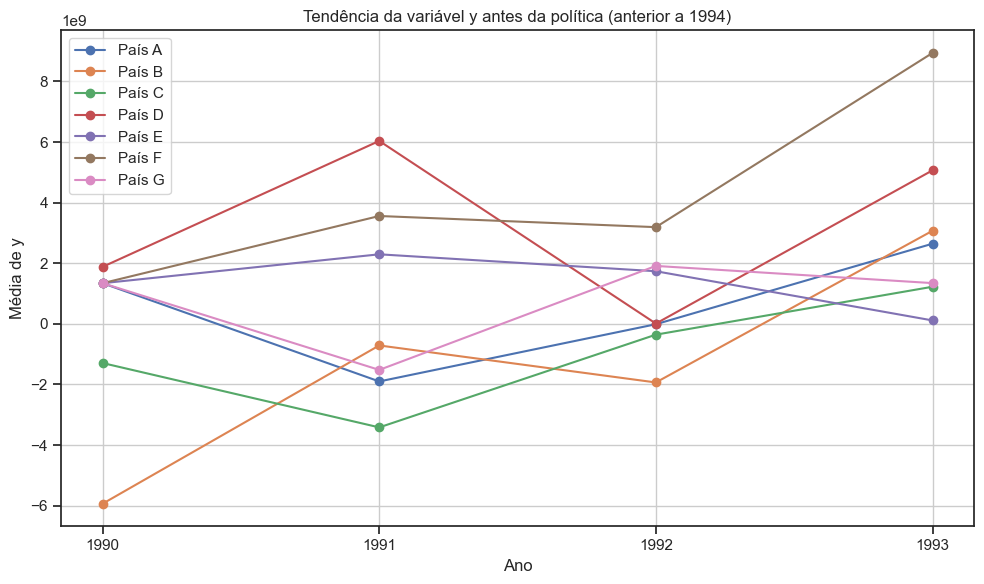

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for country in df_pre['country'].unique():
    df_country = df_pre[df_pre['country'] == country]

    plt.plot(df_country['year'], df_country['y'], marker='o', label=f'Pa√≠s {country}')

    
plt.title('Tend√™ncia da vari√°vel y antes da pol√≠tica (anterior a 1994)')
plt.xlabel('Ano')
plt.xticks([1990, 1991, 1992, 1993])
plt.ylabel('M√©dia de y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [162]:
df_pre_ctrl = df_pre[df_pre['tratado'] == 0]
df_pre_tratado = df_pre[df_pre['tratado'] == 1]

df_pre_grouped_ctrl = df_pre_ctrl.groupby('year')['y'].mean()
df_pre_grouped_tratado = df_pre_tratado.groupby('year')['y'].mean()

df_pre_grouped_ctrl

year
1990   -1.000316e+09
1991    2.629488e+06
1992   -5.724778e+08
1993    3.002741e+09
Name: y, dtype: float64

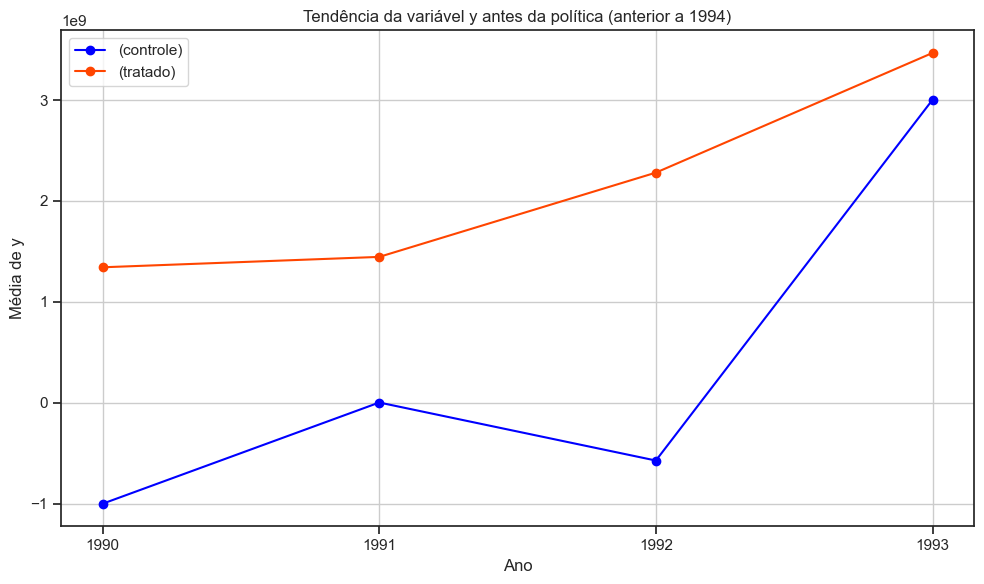

In [163]:
import matplotlib.pyplot as plt



# Cores definidas para tratado e controle
cores = {1: 'blue', 2: 'orangered'}

grouped = [df_pre_grouped_ctrl, df_pre_grouped_tratado]

plt.figure(figsize=(10, 6))

for i in range(len(grouped)):
    
    df_grouped = grouped[i]

    plt.plot(
        df_grouped.index,
        df_grouped.values,
        marker='o',
        label=f'{"(controle)" if i == 0 else "(tratado)"}',
        color=cores[i+1]
    )
    
plt.title('Tend√™ncia da vari√°vel y antes da pol√≠tica (anterior a 1994)')
plt.xlabel('Ano')
plt.xticks([1990, 1991, 1992, 1993])
plt.ylabel('M√©dia de y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Antes de 1994, as trajet√≥rias de ambos os grupos parecem relativamente paralelas, 
# ainda que em n√≠veis diferentes.

# (5) Consumo de √°lcool x taxa de mortalidade


As estat√≠sticas relacionadas com o efeito do consumo de √°lcool s√£o preocupantes,
desde as elevadas taxas de mortalidade por acidentes de tr√¢nsito at√© problemas
de sa√∫de, especialmente entre os jovens adultos. Nesta parte, voc√™ ir√°
replicar um estudo realizado por Carpenter and Dobkin [2009] sobre o efeito
do consumo de √°lcool nas taxas de mortalidade5. Os dados a serem usados
podem ser obtidos em http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta. A Tabela 1 descreve as colunas desse conjunto de dados.

Vari√°vel | Descri√ß√£o
|---------------|------------------------|
agecell | Idade do indiv√≠duo (adultos entre 19 e 22 anos)
all | Taxa de mortalidade geral
alcohol | Taxa de mortalidade por causas relacionadas ao √°lcool
homicide | Taxa de mortalidade por homic√≠dios
suicide | Taxa de mortalidade por suic√≠dio
mva | Taxa de mortalidade por acidentes de carro
drugs | Taxa de mortalidade por causas relacionadas a drogas (excluindo √°lcool)
externalother | Taxa de mortalidade por outras causas externas




Tabela 1: Descri√ß√£o dos dados usados no artigo Carpenter e Dobkin (2009).


A descontinuidade de regress√£o √© um desenho apropriado para estudar estas
quest√µes, uma vez que os jovens adultos s√£o ‚Äúnaturalmente‚Äù selecionados em dois
grupos com base na sua idade: os jovens adultos com menos de 216 anos n√£o est√£o
legalmente autorizados a beber, enquanto os jovens adultos com mais de 21 anos
s√£o legalmente proibidos de beber. Podemos comparar a taxa de mortalidade
entre esses dois grupos.

(i) Reproduza o gr√°fico apresentado na Figura 3 do estudo acima mencionado.

In [164]:
import pandas as pd

df = pd.read_stata('AEJfigs.dta')

df.dropna(inplace=True)
df.columns


Index(['agecell', 'all', 'allfitted', 'internal', 'internalfitted', 'external',
       'externalfitted', 'alcohol', 'alcoholfitted', 'homicide',
       'homicidefitted', 'suicide', 'suicidefitted', 'mva', 'mvafitted',
       'drugs', 'drugsfitted', 'externalother', 'externalotherfitted'],
      dtype='object')

In [165]:
# 21 anos √© o ponto de corte
threshold = 21

left_side = df[df['agecell'] < threshold].copy()
right_side = df[df['agecell'] >= threshold].copy()

In [166]:
left_side['agecell_norm'] = left_side['agecell'] - threshold
right_side['agecell_norm'] = right_side['agecell'] - threshold

In [167]:
import statsmodels.api as sm

y = ['all', 'internal', 'external']

pred_left = []
pred_right = []
for i in range(3):
    
    # Definir o regression model:
    X_left = left_side[['agecell_norm']]
    X_left = sm.add_constant(X_left)

    X_right = right_side[['agecell_norm']]
    X_right = sm.add_constant(X_right)

    y_left = left_side[y[i]]
    y_right = right_side[y[i]]

    # Fit
    model_left = sm.OLS(y_left, X_left).fit()
    model_right = sm.OLS(y_right, X_right).fit()

    pred_left.append(model_left.predict(X_left))
    pred_right.append(model_right.predict(X_right))

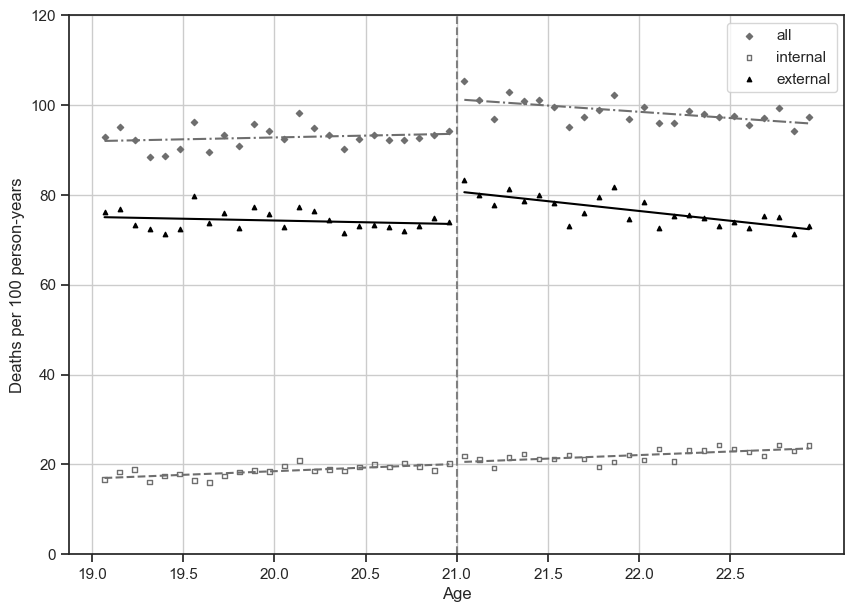

In [168]:
import matplotlib.pyplot as plt
import numpy as np

markers = ['D', 's', '^']
facecolors = ['#6e6e6e', 'none', 'black']
colors = ['#6e6e6e', '#6e6e6e', 'black']
linestyles = ['dashdot','dashed', 'solid']
labels = ['all', 'internal', 'external']

plt.figure(figsize=[10,7])
for i in range(3):
    plt.scatter(left_side['agecell'], left_side[y[i]], marker=markers[i], facecolors=facecolors[i], edgecolors=colors[i], s=10, label=labels[i])
    plt.scatter(right_side['agecell'], right_side[y[i]], marker=markers[i], facecolors=facecolors[i], edgecolors=colors[i], s=10)
    plt.plot(left_side['agecell'], pred_left[i], color=colors[i], linestyle=linestyles[i])
    plt.plot(right_side['agecell'], pred_right[i], color=colors[i], linestyle=linestyles[i])

plt.xticks(np.arange(19,23,0.5))
plt.ylim(0,120)
plt.axvline(threshold, color="gray", linestyle="--")
plt.xlabel('Age')
plt.ylabel('Deaths per 100 person-years')
plt.legend()
plt.grid(True)
plt.show()

(ii) Execute uma regress√£o descont√≠nua para ‚Äútodas‚Äù as mortes por idade (n√£o
me refiro a todas as vari√°veis, apenas √† vari√°vel chamada all). Analise os
resultados. Como voc√™ usa esses resultados para estimar a rela√ß√£o entre
consumo de √°lcool e mortalidade? Nota: O conjunto de dados fornecido
possui menos do que 50 observa√ß√µes. Sendo assim, n√£o espere reproduzir
exatamente os resultados das tabelas do artigo, que usa um conjunto de
dados completo de 1.500 observa√ß√µes. Al√©m disso, voc√™ tamb√©m n√£o tem as
mesmas vari√°veis.

In [169]:
df_reduced = df[['all', 'agecell']].copy()

threshold = 21

# vari√°vel dummy 'treatment'
df_reduced['treatment'] = (df_reduced['agecell'] < threshold).astype(int)

# Create 'score' variable centered at threshold
df_reduced['score'] = df_reduced['agecell'] - threshold

df_reduced.iloc[:5]

all    agecell  treatment     score
0  92.825401  19.068493          1 -1.931507
1  95.100739  19.150684          1 -1.849316
2  92.144295  19.232876          1 -1.767124
3  88.427757  19.315069          1 -1.684931
4  88.704941  19.397261          1 -1.602739

In [170]:
X = df_reduced[['treatment','score']]
X = sm.add_constant(X)


y = df_reduced['all']

# Fit
model = sm.OLS(y, X).fit()

print(model.summary())

# predictions
pred = model.predict(X)

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     32.99
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.51e-09
Time:                        15:18:29   Log-Likelihood:                -110.41
No. Observations:                  48   AIC:                             226.8
Df Residuals:                      45   BIC:                             232.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.5041      0.805    123.602      0.0

*Sua explica√ß√£o aqui:*

Vari√°veis no modelo:

- all: n√∫mero de mortes por alcoolismo (vari√°vel dependente).
- treatment: indicador se a idade est√° acima de 21 anos (1 se < 21, 0 caso contr√°rio).
- score: dist√¢ncia da idade em rela√ß√£o ao ponto de corte (provavelmente agecell - 21).

pela vari√°vel treatment, nota-se que h√° um aumento estatisticamente significativo de ~7,66 mortes ($\beta_1$) ao cruzar o ponto de corte (idade > 21). Percebe-se o seu valor_p bem menor que 0.05.

---

(iii) Produza o gr√°fico todas as vari√°veis por idade e adicione as linhas de regress√£o
definidas pelo resultado da regress√£o (n√£o h√° problema se as linhas
se estenderem por toda a figura. O gr√°fico que voc√™ deve produzir aqui
deve ser semelhante ao apresentado na Figura 1.

C:\Users\parai\AppData\Local\Temp\ipykernel_8496\3118975915.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


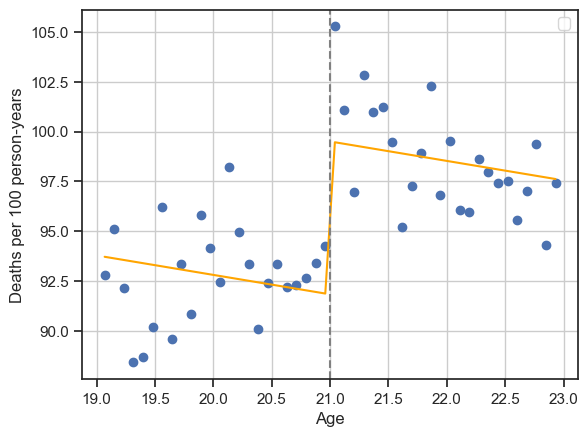

In [172]:

plt.plot(df_reduced['agecell'], pred, color='orange') # plotamos a linha de regress√£o retornada pelo modelo em 'pred' 
plt.scatter(df_reduced['agecell'], df_reduced['all'])
plt.axvline(threshold, color="gray", linestyle="--")
plt.xlabel('Age')
plt.ylabel('Deaths per 100 person-years')
plt.legend()
plt.grid(True)
plt.show()